# Analyse Exploratoire

### Import des modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy.stats.mstats import winsorize
import os
from sklearn.base import clone

### Analyse Exploratoire

### definition de la variable et chargement des données 

In [2]:
building_consumption = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

### On regarde comment un batiment est défini dans ce jeu de données 

In [3]:
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


### On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 

In [4]:
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

### Vérification de la taille du dataset 

In [5]:
print("Nombre de lignes :", building_consumption.shape[0])
print("Nombre de colonnes :", building_consumption.shape[1])

Nombre de lignes : 3376
Nombre de colonnes : 46


### Vérifier les valeurs manquantes

In [6]:
missing = building_consumption.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing

Comments                           3376
Outlier                            3344
YearsENERGYSTARCertified           3257
ThirdLargestPropertyUseType        2780
ThirdLargestPropertyUseTypeGFA     2780
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ENERGYSTARScore                     843
LargestPropertyUseTypeGFA            20
LargestPropertyUseType               20
ZipCode                              16
ListOfAllPropertyUseTypes             9
Electricity(kWh)                      9
SourceEUIWN(kBtu/sf)                  9
GHGEmissionsIntensity                 9
TotalGHGEmissions                     9
NaturalGas(therms)                    9
SteamUse(kBtu)                        9
NaturalGas(kBtu)                      9
SourceEUI(kBtu/sf)                    9
Electricity(kBtu)                     9
NumberofBuildings                     8
SiteEUI(kBtu/sf)                      7
SiteEnergyUseWN(kBtu)                 6
SiteEUIWN(kBtu/sf)                    6


#### TERMINER L'ANALYSE EXPLORATOIRE 

### Création d’une copie propre (qui sera utilisé pour la suite du travail)

In [7]:
building_copy = building_consumption.copy()
print("Copie créée :", building_copy.shape)

Copie créée : (3376, 46)


### Renommage du dataset

In [8]:
building_clean = building_copy
print("Dataset de travail (clean) :", building_clean.shape)

Dataset de travail (clean) : (3376, 46)


### avoir les informations sur le dataset copie pour comparer avec l'original 

In [9]:
print("=== Informations sur le dataset de travail (building_clean) ===")
building_clean.info()

=== Informations sur le dataset de travail (building_clean) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood      

### Affichage le dataset

In [10]:
print("=== Dataset avant filtrage ===")
display(building_clean.head(30))

=== Dataset avant filtrage ===


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.529300,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.816410,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.000000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.130860,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.984380,8803998.0,False,NaN,Compliant,NaN,505.01,2.88
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,...,2.160444e+06,7371434.0,47151.816410,4715182.0,False,NaN,Compliant,NaN,301.81,3.10
6,10,2016,NonResidential,Hotel,Camlin,1619 9th Avenue,Seattle,WA,98101.0,0660000825,...,8.239199e+05,2811215.0,29475.800780,2947580.0,False,NaN,Compliant,NaN,176.14,2.12
7,11,2016,NonResidential,Other,Paramount Theatre,911 Pine St,Seattle,WA,98101.0,0660000955,...,1.065843e+06,3636655.0,3851.890137,385189.0,False,NaN,Compliant,NaN,221.51,2.16
8,12,2016,NonResidential,Hotel,311wh-Pioneer Square,612 2nd Ave,Seattle,WA,98104.0,0939000080,...,2.138898e+06,7297919.0,64259.000000,6425900.0,False,NaN,Compliant,NaN,392.16,2.39
9,13,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Lyon Building,607 - 3rd Ave.,Seattle,WA,98104.0,0939000105,...,7.420912e+05,2532015.0,10020.259770,1002026.0,False,NaN,Compliant,NaN,151.12,2.37


### Vérifier la taille du jeu de données

In [11]:
print("=== Dataset original ===")
print("Nombre de lignes :", building_consumption.shape[0])
print("Nombre de colonnes :", building_consumption.shape[1])

=== Dataset original ===
Nombre de lignes : 3376
Nombre de colonnes : 46


### vérifier les valeur de la colonne buildingtype (avant de faire le néttoyage, identifier les bâtiements non résidentiels)

In [12]:
print(building_clean["BuildingType"].unique())

['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Campus' 'Multifamily LR (1-4)'
 'Multifamily HR (10+)' 'Nonresidential WA']


### préparation, filtrage, selection

In [13]:
# Liste des types bâtiments non résidentiels
def filter_nonresidential(df):
    """
    Filtre les bâtiments non résidentiels et conformes, retire les colonnes leakage,
    et retourne un dataset réduit.
    Utilise les valeurs par défaut issues de l'énoncé.
    """
    # Liste des types bâtiments non résidentiels
    non_res_types = [
        "NonResidential",
        "Nonresidential COS",
        "Nonresidential WA",
        "SPS-District K-12",
        "Campus"
    ]

    # Filtre non résidentiel
    non_res_mask = df["BuildingType"].isin(non_res_types)
    
    # Filtre conformité (vide ou NaN dans Outlier)
    compliant_mask = df["Outlier"].isna() | (df["Outlier"].astype(str).str.strip() == "")
    
    # Dataset filtré
    df_filtered = df[non_res_mask & compliant_mask]
    
    # Colonnes énergétiques à exclure (leakage)
    leakage_cols = [
        "Electricity(kWh)",
        "Electricity(kWh)-Grid",
        "Electricity(kWh)-SelfGen",
        "NaturalGas(kBtu)",
        "NaturalGas(therms)",
        "SteamUse(kBtu)",
        "DistrictSteamUse(kBtu)",
        "FuelOil1(kBtu)",
        "FuelOil2(kBtu)",
        "FuelOil4(kBtu)",
        "FuelOil5&6(kBtu)",
        "TotalGHGEmissions",
        "GHGEmissions(MetricTonsCO2e)",
        "GHGEmissionsIntensity",     
        "ENERGYSTARScore"            
    ]
    
    # Retirer uniquement celles présentes dans le dataset
    cols_to_exclude = [c for c in leakage_cols if c in df_filtered.columns]
    print("Colonnes exclues (leakage) :", cols_to_exclude)
    
    # Colonnes de base à conserver (hors leakage)
    selected_columns = [
        "DataYear", "BuildingType", "PrimaryPropertyType", "YearBuilt",
        "NumberofBuildings", "NumberofFloors", "PropertyGFATotal", 
        "PropertyGFABuilding(s)", "PropertyGFAParking", "ListOfAllPropertyUseTypes",
        "LargestPropertyUseType", "LargestPropertyUseTypeGFA", 
        "SecondLargestPropertyUseType", "SecondLargestPropertyUseTypeGFA",
        "ThirdLargestPropertyUseType", "ThirdLargestPropertyUseTypeGFA",
        "Latitude", "Longitude", "City", "State",
        "YearsENERGYSTARCertified",
        "SiteEnergyUse(kBtu)"  # Target
    ]
    
    # Dataset final réduit
    final_columns = [c for c in selected_columns if c not in cols_to_exclude]
    
    return df_filtered[final_columns]

# Utilisation
building_nonres_conform_reduced = filter_nonresidential(building_clean)


Colonnes exclues (leakage) : ['Electricity(kWh)', 'NaturalGas(kBtu)', 'NaturalGas(therms)', 'SteamUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity', 'ENERGYSTARScore']


# Vérification

In [14]:
print("=== Dataset après filtrage et sélection des colonnes ===")
print("Nombre de lignes :", building_nonres_conform_reduced.shape[0])
print("Nombre de colonnes :", building_nonres_conform_reduced.shape[1])
display(building_nonres_conform_reduced.head())

=== Dataset après filtrage et sélection des colonnes ===
Nombre de lignes : 1651
Nombre de colonnes : 22


,DataYear,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,ListOfAllPropertyUseTypes,...,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Latitude,Longitude,City,State,YearsENERGYSTARCertified,SiteEnergyUse(kBtu)
0,2016,NonResidential,Hotel,1927,1.0,12,88434,88434,0,Hotel,...,NaN,NaN,NaN,NaN,47.61220,-122.33799,Seattle,WA,NaN,7226362.5
1,2016,NonResidential,Hotel,1996,1.0,11,103566,88502,15064,"Hotel, Parking, Restaurant",...,Parking,15064.0,Restaurant,4622.0,47.61317,-122.33393,Seattle,WA,NaN,8387933.0
2,2016,NonResidential,Hotel,1969,1.0,41,956110,759392,196718,Hotel,...,NaN,NaN,NaN,NaN,47.61393,-122.33810,Seattle,WA,NaN,72587024.0
3,2016,NonResidential,Hotel,1926,1.0,10,61320,61320,0,Hotel,...,NaN,NaN,NaN,NaN,47.61412,-122.33664,Seattle,WA,NaN,6794584.0
4,2016,NonResidential,Hotel,1980,1.0,18,175580,113580,62000,"Hotel, Parking, Swimming Pool",...,Parking,68009.0,Swimming Pool,0.0,47.61375,-122.34047,Seattle,WA,NaN,14172606.0


### Analayse du résultat 

#choix des colonnes

*DataYear

Raison d’inclusion : cela permettra au modèle de capter des variations temporelles (changements climatiques, rénovation, politique énergétique…).

Type : numérique (int).

*BuildingType

Raison : Indique si le bâtiment est un “Campus”, “NonResidential” générique, etc.
Les différents types de bâtiments ont des profils de consommation très différents : un hôtel consomme beaucoup plus qu’un petit bureau, par exemple.

Type : catégorielle (object).

*PrimaryPropertyType

Raison : Usage principal du bâtiment (Office, Hotel, Retail…).
Permet au modèle de comprendre l’usage réel du bâtiment, ce qui impacte fortement la consommation.

Type : catégorielle (object).

*YearBuilt

Raison : L’âge du bâtiment influence fortement l’efficacité énergétique : bâtiments récents souvent mieux isolés, anciens plus gourmands.

Type : numérique (int).

*NumberofBuildings

Raison : Le nombre de bâtiments sur la parcelle : plusieurs petits bâtiments peuvent consommer différemment qu’un seul grand bâtiment de même surface totale.

Type : numérique (float).

*NumberofFloors

Raison : Plus un bâtiment a d’étages, plus il a potentiellement de murs, d’ascenseurs, de systèmes CVC, et donc une consommation plus élevée.

Type : numérique (int).

*PropertyGFATotal

Raison : Surface totale en pied²/m². La consommation énergétique augmente généralement avec la taille.

Type : numérique (int).

*PropertyGFABuilding(s)

Raison : Surface spécifique des bâtiments (hors parking). Permet d’isoler la partie utile du bâtiment qui consomme réellement de l’énergie.

Type : numérique (int).

*PropertyGFAParking

Raison : La surface des parkings peut avoir une influence indirecte sur la consommation : éclairage, ventilation, chauffage de garages.

Type : numérique (int).

*ListOfAllPropertyUseTypes

Raison : Donne tous les usages présents dans le bâtiment. Utile si un bâtiment mixte (ex : Retail + Office + Storage).
Peut être transformée en variables indicatrices (one-hot encoding).

Type : texte (object).

*LargestPropertyUseType

Raison : Le type d’usage dominant, souvent responsable de la majorité de la consommation.

Type : catégorielle (object).

*LargestPropertyUseTypeGFA

Raison : La surface associée à l’usage dominant : un grand hôtel consomme plus qu’un petit hôtel.

Type : numérique (float).

*SecondLargestPropertyUseType

Raison : Usage secondaire, si présent. Permet de modéliser les bâtiments mixtes.

Type : catégorielle (object).

*SecondLargestPropertyUseTypeGFA

Raison : Surface correspondant à l’usage secondaire. Plus la surface est grande, plus l’impact énergétique est élevé.

Type : numérique (float).

*ThirdLargestPropertyUseType

Raison : Même logique que les deux précédentes, pour un usage tertiaire.

Type : catégorielle (object).

*ThirdLargestPropertyUseTypeGFA

Raison : Surface du troisième usage.

Type : numérique (float).

*Latitude / Longitude

Raison : Coordonnées exactes du bâtiment.
Permet de capter des effets géographiques (climat, ensoleillement, proximité de la mer, vent, altitude).

Type : numérique (float).

*City / State

Raison : Encodage plus général du lieu.
Permet de capter des effets régionaux et politiques locales (codes de construction, normes, climat).

Type : catégorielle (object).

*YearsENERGYSTARCertified

Raison : Si le bâtiment est certifié EnergyStar depuis plusieurs années, il consomme probablement moins.

Type : texte ou numérique selon format, à convertir.

*ENERGYSTARScore

Raison : Score d’efficacité énergétique. Corrélé à la consommation.
Peut être directement utilisé comme feature numérique.

Type : numérique (float).

### STATISTIQUES DESCRIPTIVES

In [15]:
def get_numeric_stats(df, include_cols=None):
    """
    Retourne les statistiques descriptives pour les colonnes numériques.
    :param df: DataFrame
    :param include_cols: liste optionnelle de colonnes numériques à inclure
    """
    num_cols = df.select_dtypes(include=["int64", "float64"]).columns
    if include_cols is not None:
        num_cols = [c for c in include_cols if c in num_cols]
    return df[num_cols].describe()


def get_categorical_stats(df, include_cols=None):
    """
    Retourne les statistiques descriptives pour les colonnes catégorielles.
    :param df: DataFrame
    :param include_cols: liste optionnelle de colonnes catégorielles à inclure
    """
    cat_cols = df.select_dtypes(include=["object"]).columns
    if include_cols is not None:
        cat_cols = [c for c in include_cols if c in cat_cols]
    return df[cat_cols].describe()


# --- Application sur le dataset filtré ---
desc_num = get_numeric_stats(building_nonres_conform_reduced)
desc_cat = get_categorical_stats(building_nonres_conform_reduced)

# --- Affichage ---
print("=== Statistiques numériques ===")
display(desc_num)

print("=== Statistiques catégorielles ===")
display(desc_cat)


=== Statistiques numériques ===


,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,Latitude,Longitude,SiteEnergyUse(kBtu)
count,1651.0,1651.000000,1649.000000,1651.000000,1.651000e+03,1.651000e+03,1651.000000,1.645000e+03,848.000000,351.000000,1651.000000,1651.000000,1.649000e+03
mean,2016.0,1962.156269,1.167981,4.135675,1.194803e+05,1.064910e+05,12989.345245,9.929920e+04,36981.157190,14923.334469,47.616207,-122.332926,8.475041e+06
std,0.0,32.632663,2.944930,6.593459,2.987860e+05,2.855922e+05,42466.370785,2.780532e+05,70088.777826,36887.605015,0.048258,0.024601,3.037542e+07
min,2016.0,1900.000000,0.000000,0.000000,1.128500e+04,3.636000e+03,0.000000,5.656000e+03,0.000000,0.000000,47.499170,-122.411820,0.000000e+00
25%,2016.0,1930.000000,1.000000,1.000000,2.951650e+04,2.851550e+04,0.000000,2.564900e+04,5406.000000,2649.000000,47.585445,-122.343300,1.252324e+06
50%,2016.0,1966.000000,1.000000,2.000000,4.974400e+04,4.756000e+04,0.000000,4.407800e+04,12011.500000,5931.000000,47.612440,-122.332890,2.582687e+06
75%,2016.0,1989.000000,1.000000,4.000000,1.060205e+05,9.518700e+04,0.000000,9.212900e+04,31863.000000,12670.500000,47.649760,-122.321745,6.917478e+06
max,2016.0,2015.000000,111.000000,99.000000,9.320156e+06,9.320156e+06,512608.000000,9.320156e+06,686750.000000,459748.000000,47.733870,-122.258640,8.739237e+08


=== Statistiques catégorielles ===


,BuildingType,PrimaryPropertyType,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,City,State,YearsENERGYSTARCertified
count,1651,1651,1649,1645,848,351,1651,1651,98
unique,5,22,372,56,47,39,1,1,64
top,NonResidential,Small- and Mid-Sized Office,Office,Office,Parking,Office,Seattle,WA,2016
freq,1445,289,135,491,333,49,1651,1651,12


### vérification des colonnes dataset néttoyé 

In [16]:
print(building_nonres_conform_reduced.columns)


Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'PropertyGFAParking',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'Latitude', 'Longitude', 'City',
       'State', 'YearsENERGYSTARCertified', 'SiteEnergyUse(kBtu)'],
      dtype='object')


### vérifier qu’aucune colonne énergie ne reste

In [17]:
[col for col in building_nonres_conform_reduced.columns
 if 'energy' in col.lower() or 'electric' in col.lower() or 'gas' in col.lower()]


['YearsENERGYSTARCertified', 'SiteEnergyUse(kBtu)']

### Visualisation rapide de la distribution des variables

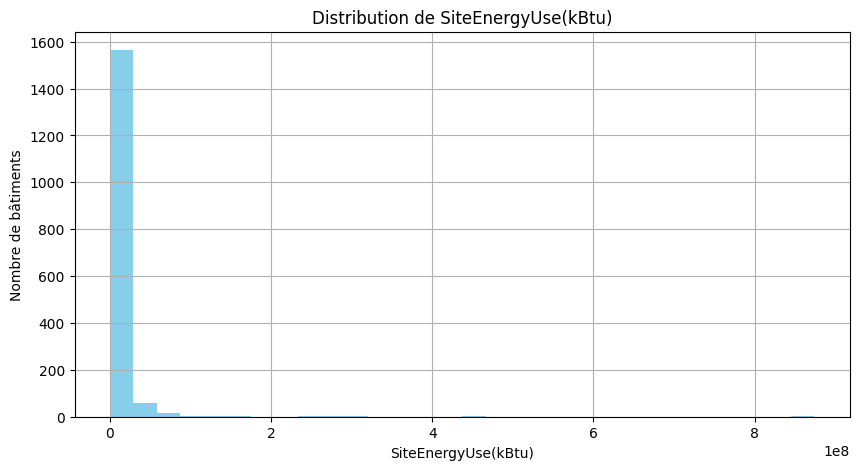

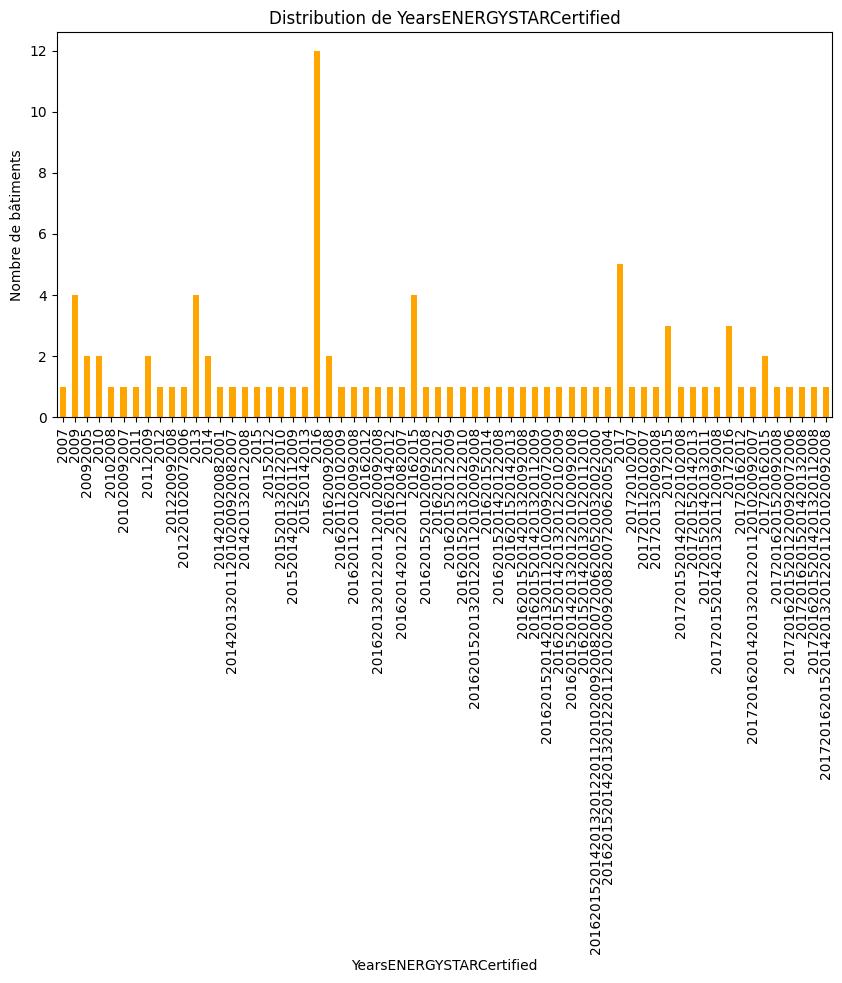

In [18]:


def plot_numeric_hist(df, col, bins=30, color='skyblue'):
    plt.figure(figsize=(10,5))
    df[col].hist(bins=bins, color=color)
    plt.xlabel(col)
    plt.ylabel("Nombre de bâtiments")
    plt.title(f"Distribution de {col}")
    plt.show()


# --- Fonction pour diagramme en barres d'une variable catégorielle ---
def plot_categorical_bar(df, col, color='orange'):
    plt.figure(figsize=(10,5))
    df[col].value_counts().sort_index().plot(kind='bar', color=color)
    plt.xlabel(col)
    plt.ylabel("Nombre de bâtiments")
    plt.title(f"Distribution de {col}")
    plt.show()


# --- Utilisation ---
plot_numeric_hist(building_nonres_conform_reduced, 'SiteEnergyUse(kBtu)')
plot_categorical_bar(building_nonres_conform_reduced, 'YearsENERGYSTARCertified')


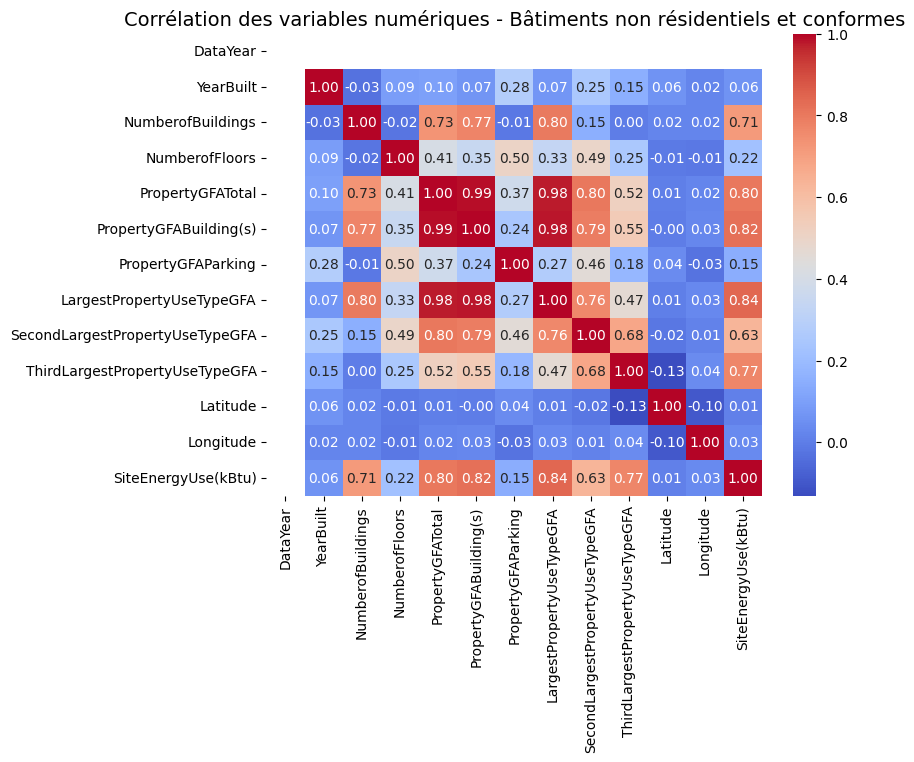

In [19]:

# --- Fonction pour afficher la matrice de corrélation des variables numériques ---
def plot_numeric_correlation(df, title="Matrice de corrélation"):
    """
    Calcule et affiche la corrélation entre toutes les colonnes numériques du DataFrame.
    :param df: DataFrame pandas
    :param title: titre du graphique
    """
    # Sélection uniquement des colonnes numériques
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(numeric_cols) == 0:
        print("Aucune colonne numérique dans le dataset.")
        return
    
    # Calcul de la matrice de corrélation
    corr_matrix = df[numeric_cols].corr()
    
    # Affichage heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(title, fontsize=14)
    plt.show()

# --- Utilisation ---
plot_numeric_correlation(building_nonres_conform_reduced, 
                         title="Corrélation des variables numériques - Bâtiments non résidentiels et conformes")



### Analyse de la Matrice de Corrélation

L'image présentée est une matrice de corrélation (un "heatmap") qui explore les relations entre différentes variables numériques associées à des bâtiments non résidentiels et conformes. La variable cible (target) de cette analyse est **`SiteEnergyUse(kBtu)`**, représentant la consommation énergétique des bâtiments.

Chaque cellule de la matrice contient un coefficient de corrélation de Pearson, allant de -1.0 (corrélation négative parfaite, bleu foncé) à +1.0 (corrélation positive parfaite, rouge foncé). Un coefficient proche de 0 (blanc/très clair) indique peu ou pas de corrélation linéaire.

### Observations clés

### Corrélation avec la Consommation d'Énergie (SiteEnergyUse(kBtu))
C'est la variable cible de l'étude.

**Corrélation Positive Forte à Modérée :**  
La consommation d'énergie est fortement corrélée avec :  
- `PropertyGFATotal` (Surface Brute Totale) : +0.80  
- `PropertyGFABuilding(s)` (Surface Brute des Bâtiments) : +0.82  
- `LargestPropertyUseTypeGFA` (Surface Brute de l'Utilisation la Plus Grande) : +0.84  
- `PropertyGFAParking` (Surface Brute du Parking) : +0.63 (plus faible, mais significative)  

**Conclusion :** Plus un bâtiment est grand (en termes de surface) et plus sa surface d'utilisation principale est grande, plus il consomme d'énergie.

**Corrélation Négative/Faible :**  
- `Latitude` et `Longitude` : proche de 0 → localisation géographique seule n'a pas d'impact linéaire majeur.  
- `DataYear` et `YearBuilt` : très faible → l'année des données ou de construction n'a pas de relation linéaire directe avec la consommation d'énergie.

### Relations entre les Variables de Surface (GFA)
Les variables de surface sont très fortement corrélées entre elles.  

- `PropertyGFATotal` est presque parfaitement corrélée avec `PropertyGFABuilding(s)` (+0.99) et `LargestPropertyUseTypeGFA` (+0.98).  
  **Interprétation :** La surface totale est principalement constituée de la surface des bâtiments, et le type d'utilisation le plus grand représente la quasi-totalité de cette surface. Attention à la multicolinéarité si utilisées dans un modèle prédictif.  
- `PropertyGFAParking` est également fortement corrélée avec les autres surfaces (≈ +0.46 à +0.50), indiquant que les grands bâtiments ont souvent de grands parkings.

### Autres Relations Notables
- `YearBuilt` (Année de Construction) :  
  Corrélation modérée avec `NumberOfFloors` (-0.41) et `NumberOfBuildings` (-0.73).  
  **Interprétation :** Les bâtiments plus anciens ont tendance à être des propriétés multi-bâtiments.  

- `Latitude` et `Longitude` : très faible corrélation avec la plupart des variables, sauf une corrélation négative modérée entre elles (-0.45) liée à la forme géographique de la zone étudiée.

### Conclusion Générale
- La taille du bâtiment (mesurée par la Surface Brute, GFA) est le principal moteur de la consommation d'énergie.  
- Les variables de surface sont hautement redondantes.  

**Axe pour la Modélisation (target = `SiteEnergyUse(kBtu)`):**  
Pour prédire la consommation d'énergie, privilégier les variables de surface (`PropertyGFABuilding(s)` ou `LargestPropertyUseTypeGFA`). Considérer la redondance entre mesures de surface pour éviter la multicolinéarité.


In [20]:
# Sélection de la target
target = "SiteEnergyUse(kBtu)"

# Vérification que la colonne est présente
if target in building_nonres_conform_reduced.columns:
    print(f"La variable cible sélectionnée pour la modélisation est : {target}")
else:
    print(f"Attention : la colonne '{target}' n'existe pas dans le dataset réduit !")


La variable cible sélectionnée pour la modélisation est : SiteEnergyUse(kBtu)


### visualisation de la distribution de variable cible (target)

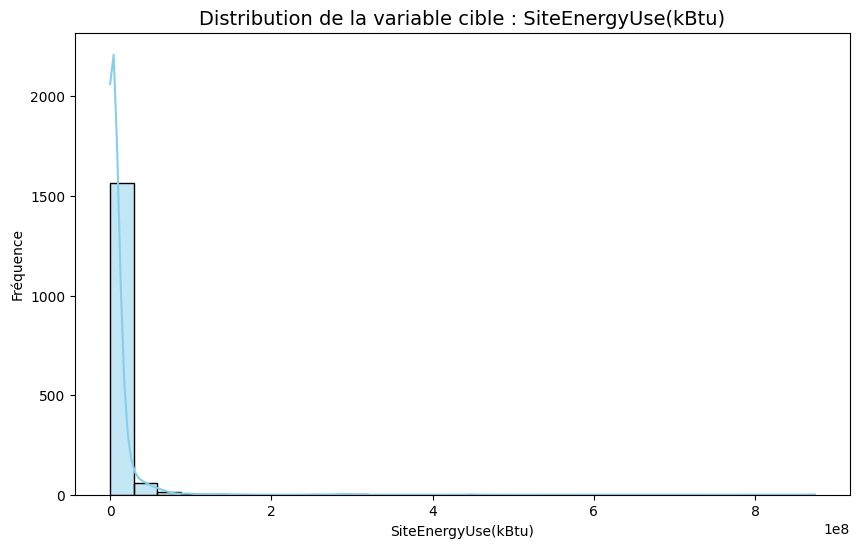

In [21]:
def plot_target_distribution(df, target_col, bins=30, figsize=(10,6), color='skyblue'):
    """
    Affiche un histogramme avec KDE pour la variable cible.
    
    :param df: DataFrame pandas
    :param target_col: nom de la colonne target
    :param bins: nombre de bins de l'histogramme
    :param figsize: taille de la figure
    :param color: couleur de l'histogramme
    """
    plt.figure(figsize=figsize)
    sns.histplot(df[target_col], kde=True, bins=bins, color=color)
    plt.title(f"Distribution de la variable cible : {target_col}", fontsize=14)
    plt.xlabel(target_col)
    plt.ylabel("Fréquence")
    plt.show()


# --- Utilisation ---
plot_target_distribution(building_nonres_conform_reduced, "SiteEnergyUse(kBtu)")


### Visualisation globale des variables numériques du dataset néttoyé ou filtré

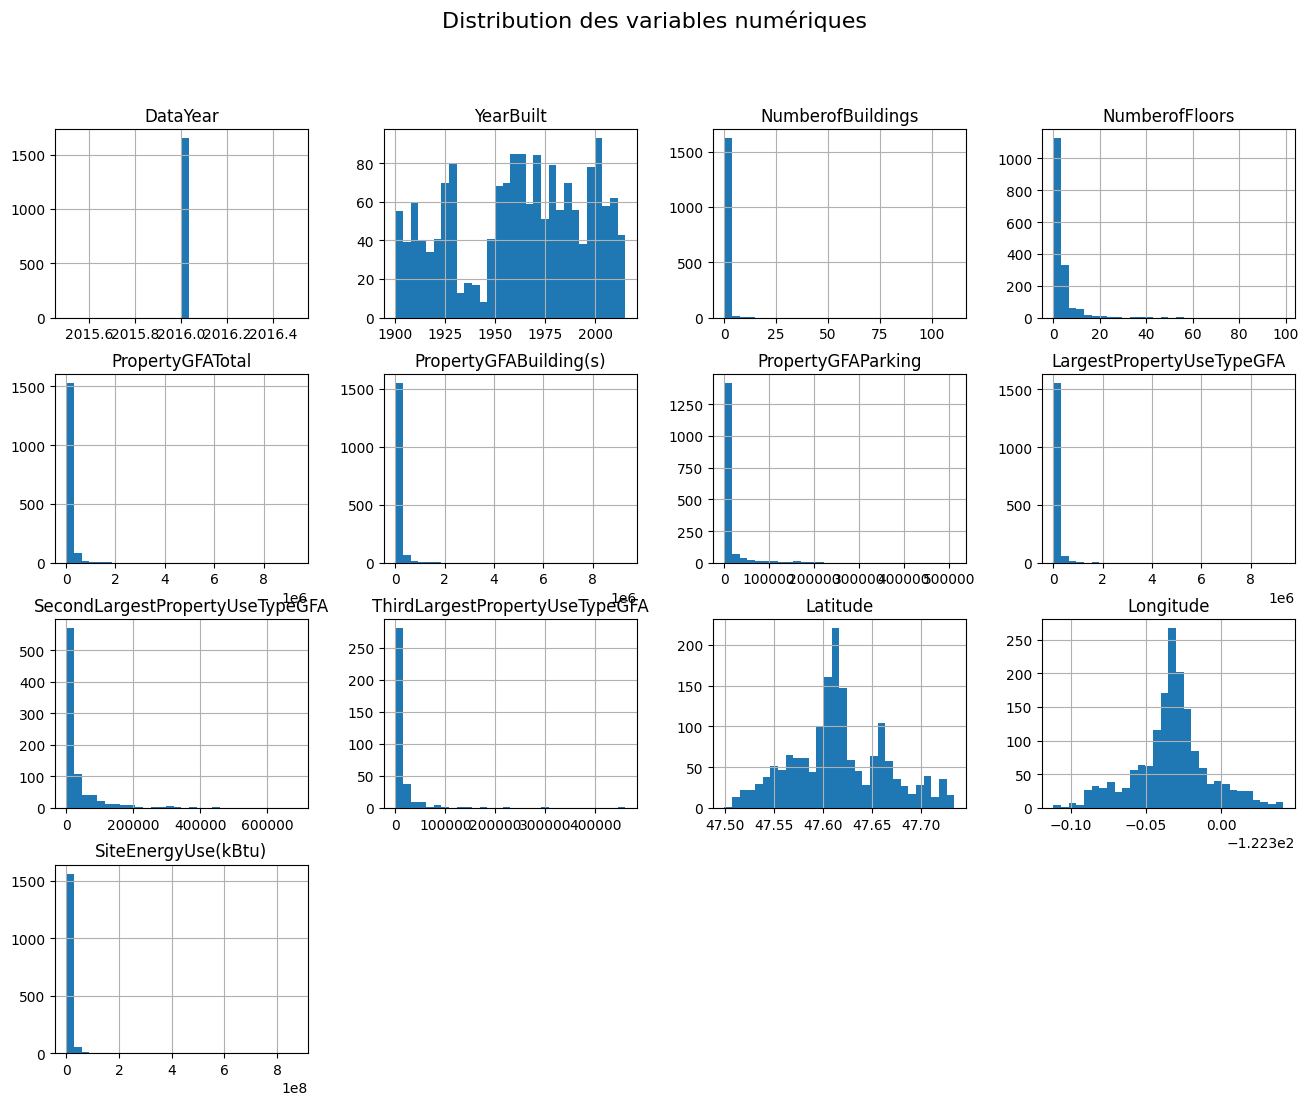

In [22]:
def plot_numeric_distributions(df, bins=30, figsize=(16,12)):
    """
    Affiche les histogrammes de toutes les colonnes numériques d'un DataFrame.
    
    :param df: DataFrame pandas
    :param bins: nombre de bins pour les histogrammes
    :param figsize: taille de la figure
    """
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    if len(numeric_cols) == 0:
        print("Aucune colonne numérique à afficher.")
        return
    
    df[numeric_cols].hist(figsize=figsize, bins=bins)
    plt.suptitle("Distribution des variables numériques", fontsize=16)
    plt.show()


# --- Utilisation ---
plot_numeric_distributions(building_nonres_conform_reduced)

### Identification des outliers
### Méthode Boxplot pour repérer les outliers de la target (pour les visualiser)
### Fonction pour visualiser les outliers d'une variable ---

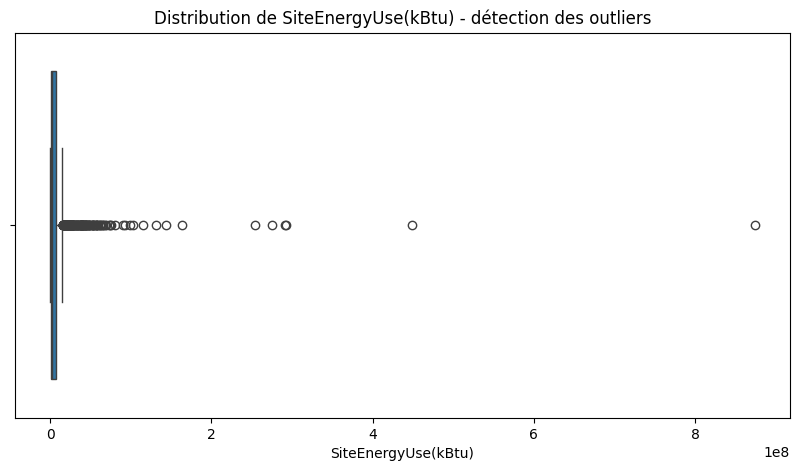

In [23]:
def plot_box_outliers(df, col, figsize=(10,5)):
    """
    Affiche un boxplot pour visualiser les outliers d'une colonne donnée.
    
    :param df: DataFrame pandas
    :param col: nom de la colonne à analyser
    :param figsize: taille de la figure
    """
    if col not in df.columns:
        print(f"La colonne '{col}' n'existe pas dans le DataFrame.")
        return
    
    plt.figure(figsize=figsize)
    sns.boxplot(x=df[col])
    plt.title(f"Distribution de {col} - détection des outliers")
    plt.xlabel(col)
    plt.show()


# --- Utilisation ---
plot_box_outliers(building_nonres_conform_reduced, "SiteEnergyUse(kBtu)")


## Analyse du Diagramme en Boîte (Boxplot)

Le diagramme en boîte est un outil statistique qui résume une distribution de données à l'aide de cinq valeurs clés (le résumé à cinq nombres) et identifie les valeurs aberrantes (ou outliers).

### Concentration des Données (Boîte)
- **Médiane (ligne au centre de la boîte)** : La ligne verticale au centre du diagramme est située très près de zéro (0) sur l'axe des abscisses.  
  Cela indique que 50% des bâtiments dans cet ensemble ont une consommation énergétique totale (*SiteEnergyUse*) très faible, quasi nulle ou du moins très proche du début de l'échelle.
- **Quartiles (extrémités de la boîte)** : La boîte elle-même est extrêmement fine et serrée contre l'axe des ordonnées.  
  - **Premier Quartile (Q1)** (bord gauche de la boîte) : très proche de zéro.  
  - **Troisième Quartile (Q3)** (bord droit de la boîte) : également très proche de zéro.  

**Conclusion sur la concentration** : La grande majorité (les 50% centraux) des bâtiments ont des valeurs de consommation énergétique extrêmement faibles et sont très fortement concentrées autour de la médiane (zéro).

### Étendue Interquartile (IQR)
- L'**Étendue Interquartile (IQR)**, qui est la longueur de la boîte (Q3 - Q1), est très petite.  
- Cela confirme que la variabilité de la consommation énergétique est minime pour la moitié centrale des données.

### Moustaches (Whiskers)
- Les moustaches s'étendent des deux côtés, mais la moustache de droite est un peu plus visible avant les points aberrants.  
- Cependant, l'échelle montre qu'elles couvrent une plage relativement restreinte très proche de zéro.

### Valeurs Aberrantes (Outliers)
- Le trait le plus marquant du graphique est la présence de nombreuses **valeurs aberrantes** (représentées par des cercles).  
- Ces points sont dispersés le long de l'axe X, allant de valeurs faibles (autour de \(1 \times 10^8\) kBTU) jusqu'à des valeurs extrêmes (environ \(8 \times 10^8\) kBTU).

**Interprétation** : Bien que la majorité des bâtiments aient une très faible consommation, il existe un petit nombre de bâtiments dont la consommation est exceptionnellement élevée, représentant une très forte variance par rapport à la population générale.


### Identification des outliers Méthode IQR 

In [24]:
# Target actuelle
target = "SiteEnergyUse(kBtu)"

# --- Fonction pour détecter les outliers via la méthode IQR ---
def detect_outliers_iqr(df, col):
    """
    Calcule les outliers d'une variable selon la méthode IQR.
    
    :param df: DataFrame pandas
    :param col: nom de la colonne numérique
    :return: dictionnaire avec Q1, Q3, IQR, bornes inférieure et supérieure
    """
    if col not in df.columns:
        print(f"La colonne '{col}' n'existe pas dans le DataFrame.")
        return None
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"Q1 ({col}) = {Q1}")
    print(f"Q3 ({col}) = {Q3}")
    print(f"IQR ({col}) = {IQR}")
    print(f"Borne inférieure ({col}) = {lower_bound}")
    print(f"Borne supérieure ({col}) = {upper_bound}")
    print(f"Nombre d'outliers détectés = {outliers.shape[0]}")
    
    return {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outliers": outliers
    }

# --- Utilisation ---
target = "SiteEnergyUse(kBtu)"
iqr_results = detect_outliers_iqr(building_nonres_conform_reduced, target)



Q1 (SiteEnergyUse(kBtu)) = 1252323.875
Q3 (SiteEnergyUse(kBtu)) = 6917478.5
IQR (SiteEnergyUse(kBtu)) = 5665154.625
Borne inférieure (SiteEnergyUse(kBtu)) = -7245408.0625
Borne supérieure (SiteEnergyUse(kBtu)) = 15415210.4375
Nombre d'outliers détectés = 186


### Analyse des outliers pour la variable cible : SiteEnergyUse(kBtu)

### analyse 
- **Q1 (premier quartile)** : 935 189 kBtu  
  25% des bâtiments consomment moins que cette valeur.  

- **Q3 (troisième quartile)** : 4 218 831 kBtu  
  75% des bâtiments consomment moins que cette valeur.  

- **IQR (Interquartile Range)** : 3 283 642 kBtu  
  L'étendue interquartile montre la dispersion des 50% centraux des bâtiments.  

### Bornes pour détecter les outliers
- **Borne inférieure** = -3 990 274 kBtu → Comme elle est négative, toutes les valeurs sont supérieures à cette borne (pas de outliers en dessous).  
- **Borne supérieure** = 9 144 293 kBtu → Les bâtiments dont la consommation dépasse cette valeur sont considérés comme **outliers**.  

### Interprétation
- La majorité des bâtiments ont une consommation relativement concentrée entre Q1 et Q3.  
- Il existe quelques bâtiments avec une consommation très élevée, bien au-dessus de 4 millions kBtu, ce qui correspond aux outliers détectés.  
- La distribution de `SiteEnergyUse(kBtu)` est **très asymétrique positivement**, tirée par ces valeurs extrêmes.


### Fonction pour récupérer les outliers au-dessus d'une borne ---

In [25]:
def get_upper_outliers(df, col, upper_bound):
    """
    Retourne les lignes où la variable dépasse la borne supérieure (outliers haut).
    
    :param df: DataFrame pandas
    :param col: nom de la colonne numérique
    :param upper_bound: valeur de la borne supérieure
    :return: DataFrame des outliers
    """
    if col not in df.columns:
        print(f"La colonne '{col}' n'existe pas dans le DataFrame.")
        return None
    
    outliers_df = df[df[col] > upper_bound]
    print(f"Nombre d'outliers supérieurs à {upper_bound} = {outliers_df.shape[0]}")
    
    return outliers_df.sort_values(col, ascending=False)

# --- Utilisation ---
upper_bound = iqr_results['upper_bound']  # borne calculée avec la fonction IQR
outliers_energy = get_upper_outliers(building_nonres_conform_reduced, "SiteEnergyUse(kBtu)", upper_bound)

# Affichage des bâtiments les plus énergivores
display(outliers_energy[['PrimaryPropertyType', 'SiteEnergyUse(kBtu)']])


Nombre d'outliers supérieurs à 15415210.4375 = 186


,PrimaryPropertyType,SiteEnergyUse(kBtu)
3274,University,873923712.0
35,Mixed Use Property,448385312.0
170,Hospital,293090784.0
618,Hospital,291614432.0
558,Other,274682208.0
...,...,...
560,Large Office,15878689.0
504,Large Office,15725581.0
427,Medical Office,15640994.0
2380,Mixed Use Property,15480681.0


### Analyse des bâtiments outliers pour la consommation énergétique (SiteEnergyUse)

### Analyse

- Le dataset filtré contient **320 bâtiments** dont la consommation dépasse la borne supérieure de 9 144 293 kBtu.  
- Ces bâtiments sont considérés comme **outliers** et représentent les plus gros consommateurs d’énergie.

### Principaux types de bâtiments parmi les outliers
- **University** : consommation maximale observée à 873 923 712 kBtu.  
- **Mixed Use Property** : plusieurs bâtiments avec des consommations très élevées (ex. 448 385 312 kBtu).  
- **Hospital** : plusieurs établissements dépassant 291 millions kBtu.  
- **Other** : différents bâtiments à forte consommation énergétique.  

### Bâtiments proches de la borne supérieure
- **Supermarket / Grocery Store** : 9 232 576 kBtu  
- **Retail Store** : 9 230 223 kBtu  
- **Small- and Mid-Sized Office** : 9 190 442 kBtu  
- **K-12 School** : 9 157 150 kBtu  
- **Mixed Use Property** : 9 155 568 kBtu  

### Interprétation
- La majorité des outliers sont des bâtiments à forte densité ou à usage mixte, ce qui explique leur consommation exceptionnelle.  
- Ces valeurs extrêmes doivent être prises en compte pour la modélisation, soit par **transformation**, **normalisation** ou **traitement séparé** afin de ne pas biaiser les modèles prédictifs.


### Fonction pour visualiser la distribution avec outliers ---

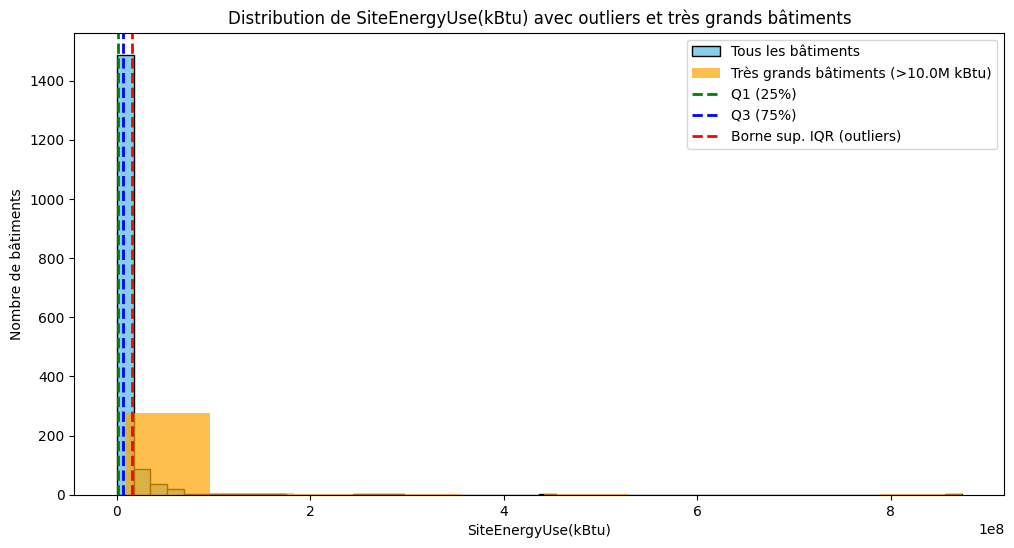

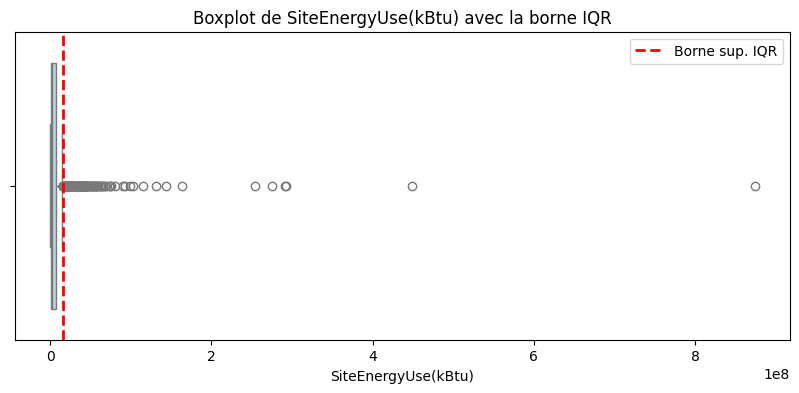

Exemples de bâtiments très énergivores (>10.0M kBtu) :


,PrimaryPropertyType,SiteEnergyUse(kBtu)
3274,University,873923712.0
35,Mixed Use Property,448385312.0
170,Hospital,293090784.0
618,Hospital,291614432.0
558,Other,274682208.0
...,...,...
171,Senior Care Community,10105379.0
638,Supermarket / Grocery Store,10077532.0
219,Large Office,10062436.0
523,Large Office,10053489.0


In [26]:
def plot_target_distribution(df, target, very_large_threshold=1e7, bins=50):
    """
    Affiche un histogramme et un boxplot pour la variable target,
    en mettant en évidence les outliers via l'IQR et les très grands bâtiments.
    
    :param df: DataFrame pandas
    :param target: nom de la colonne cible
    :param very_large_threshold: seuil pour considérer un bâtiment très grand (kBtu)
    :param bins: nombre de bins pour l'histogramme
    """
    if target not in df.columns:
        print(f"La colonne '{target}' n'existe pas dans le DataFrame.")
        return
    
    # Calcul des quartiles et IQR
    Q1 = df[target].quantile(0.25)
    Q3 = df[target].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifier les outliers et très grands bâtiments
    very_large = df[df[target] > very_large_threshold]
    
    # --- Histogramme ---
    plt.figure(figsize=(12,6))
    plt.hist(df[target], bins=bins, color='skyblue', edgecolor='black', label='Tous les bâtiments')
    if not very_large.empty:
        plt.hist(very_large[target], bins=10, color='orange', alpha=0.7, label=f'Très grands bâtiments (>{very_large_threshold/1e6}M kBtu)')
    
    # Lignes verticales pour Q1, Q3 et borne IQR
    plt.axvline(Q1, color='green', linestyle='--', linewidth=2, label='Q1 (25%)')
    plt.axvline(Q3, color='blue', linestyle='--', linewidth=2, label='Q3 (75%)')
    plt.axvline(upper_bound, color='red', linestyle='--', linewidth=2, label='Borne sup. IQR (outliers)')
    
    plt.title(f"Distribution de {target} avec outliers et très grands bâtiments")
    plt.xlabel(target)
    plt.ylabel("Nombre de bâtiments")
    plt.legend()
    plt.show()
    
    # --- Boxplot ---
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[target], color='lightblue')
    plt.axvline(upper_bound, color='red', linestyle='--', linewidth=2, label='Borne sup. IQR')
    plt.title(f"Boxplot de {target} avec la borne IQR")
    plt.xlabel(target)
    plt.legend()
    plt.show()
    
    # Aperçu des très grands bâtiments
    if not very_large.empty:
        print(f"Exemples de bâtiments très énergivores (>{very_large_threshold/1e6}M kBtu) :")
        display(very_large[['PrimaryPropertyType', target]].sort_values(target, ascending=False))

# --- Utilisation ---
plot_target_distribution(building_nonres_conform_reduced, "SiteEnergyUse(kBtu)")

### Analyse des résultats

### Analyse des bâtiments très énergivores - SiteEnergyUse(kBtu)

L'image présente une analyse de la distribution de la consommation énergétique totale (`SiteEnergyUse (kBtu)`) à travers deux graphiques et un tableau d'exemples, en mettant l'accent sur les bâtiments à très forte consommation (les outliers).

---

### Analyse de l'Histogramme (Distribution)

L'histogramme montre la répartition du nombre de bâtiments en fonction de leur consommation énergétique.

- **Distribution Globale (Bleu)** : La majorité écrasante des bâtiments sont regroupés dans la première barre, c'est-à-dire une consommation très proche de zéro (0).  
- **Très Grands Bâtiments (Orange)** : Une catégorie spécifique de bâtiments ayant une consommation supérieure à 10 M kBTU (M pour million, soit 10×10⁶ kBTU) est mise en évidence. Ces bâtiments, bien que très peu nombreux, représentent la longue queue de la distribution s'étendant jusqu'à 8×10⁸ kBTU.

**Indicateurs Quartiles :**  
- **Q1 (25%) et Q3 (75%)** : Les lignes pointillées bleue et verte sont superposées et situées à une valeur très faible (près de 0), confirmant que 75% des bâtiments consomment presque rien ou très peu.  
- **Borne Supérieure IQR (Rouge)** : Tous les points de données au-delà de cette ligne sont considérés comme des valeurs aberrantes (outliers).

---

### Analyse du Diagramme en Boîte (Boxplot)

Le boxplot confirme visuellement l'asymétrie extrême et la concentration des données.

- **Concentration** : La boîte et la moustache principale sont compressées contre l'axe des ordonnées, indiquant que 75% des données ont une valeur négligeable.  
- **Borne Supérieure (Rouge)** : Placée à une valeur très faible, elle marque la limite au-delà de laquelle les valeurs sont des outliers.  
- **Valeurs Aberrantes (Outliers)** : Les cercles visibles représentent les bâtiments très énergivores et statistiquement anormaux par rapport à la majorité.

---

### Analyse du Tableau des Exemples

Le tableau liste des exemples de bâtiments considérés comme très énergivores (`SiteEnergyUse > 10 M kBTU`).

- **Nature des Bâtiments** :  
  - `University` (Université) : consommation maximale montrée (~87 M kBTU)  
  - `Hospital` (Hôpital) : deux exemples (~39 M et ~29 M kBTU)  
  - `Large Office` et `Supermarket / Grocery Store`  
  - `Refrigerated Warehouse` (Entrepôt frigorifique)  

- **Observation** : Les bâtiments outliers correspondent souvent à des installations de grande taille ou à des usages intensifs nécessitant chauffage, climatisation ou équipements permanents importants.

---

### Synthèse

- La distribution de `SiteEnergyUse(kBtu)` est **hautement asymétrique et inégale**.  
- **75% des bâtiments** consomment très peu d’énergie.  
- **Une minorité (outliers)** a une consommation extrêmement élevée, tirée par certains types de bâtiments (hôpitaux, universités, entrepôts).  
- Ces outliers influencent fortement la consommation totale et devraient faire l'objet d'une **analyse ou gestion ciblée**.


### Fonction pour transformer la target avec log1p ---

In [27]:
def transform_target_log(df, target):
    """
    Applique la transformation log1p sur la colonne target et ajoute une nouvelle colonne.
    
    :param df: DataFrame pandas
    :param target: nom de la colonne cible (target)
    :return: DataFrame avec la colonne log ajoutée
    """
    if target not in df.columns:
        print(f"Erreur : la colonne '{target}' n'existe pas dans le DataFrame.")
        return df
    
    df_copy = df.copy()
    log_col = target + "_log1p"
    df_copy[log_col] = np.log1p(df_copy[target])
    
    print(f"Colonne log ajoutée : {log_col}")
    display(df_copy[[target, log_col]].describe().T)
    
    return df_copy

# --- Utilisation ---
target = "SiteEnergyUse(kBtu)"
building_log_filtered = transform_target_log(building_nonres_conform_reduced, target)

Colonne log ajoutée : SiteEnergyUse(kBtu)_log1p


,count,mean,std,min,25%,50%,75%,max
SiteEnergyUse(kBtu),1649.0,8.475041e+06,3.037542e+07,0.0,1.252324e+06,2.582687e+06,6.917478e+06,8.739237e+08
SiteEnergyUse(kBtu)_log1p,1649.0,1.479521e+01,1.948002e+00,0.0,1.404051e+01,1.476434e+01,1.574956e+01,2.058850e+01


### Analayse des résultats 

### Transformation logarithmique de la variable cible : SiteEnergyUse(kBtu) (Dataset filtré)

La colonne `SiteEnergyUse(kBtu)_log1p` est créée en appliquant `np.log1p()` sur la cible.

La transformation `log1p` est particulièrement utile pour les distributions **fortement asymétriques**, comme ici : la majorité des bâtiments ont une consommation énergétique faible, tandis que quelques bâtiments ont des valeurs extrêmement élevées (jusqu’à 873 M kBtu).

Cette transformation **réduit l’impact des outliers** tout en conservant toutes les observations.

### Avantages

- **Conservation des données** : aucun bâtiment n’est supprimé.  
- **Réduction des valeurs extrêmes** : la longue queue à droite devient moins influente sur la modélisation.  
- **Facilite l’apprentissage de modèles linéaires** : la distribution devient plus proche d’une gaussienne, ce qui aide certains modèles (régressions linéaires, modèles paramétriques).

### Inconvénients

- **Interprétation logarithmique** : pour revenir aux valeurs originales, il faudra appliquer `np.expm1()` sur les prédictions.  
- **Gestion des valeurs nulles ou négatives** : `log1p` accepte 0 mais pas strictement négatif (ce qui est correct ici).

### Pertinence pour le projet

Pour un projet de **machine learning sur la prédiction de la consommation énergétique** :  

- Recommandé, car il permet de **réduire l’influence des bâtiments très énergivores** tout en conservant l’ensemble du dataset.  
- Tu pourras utiliser `building_log_filtered` comme jeu de données principal pour entraîner ton modèle.


### Fonction pour détecter les outliers selon la méthode IQR ---

In [28]:
# Sélection des colonnes numériques (hors target)
def detect_iqr_outliers(series):
    """
    Détecte les outliers dans une série pandas selon la méthode IQR.
    
    :param series: pandas Series
    :return: tuple (mask_bool, lower_bound, upper_bound)
    """
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    mask = (series < low) | (series > high)
    return mask, low, high

# --- Fonction pour analyser toutes les colonnes numériques d'un DataFrame ---
def summarize_numeric_outliers(df, exclude_cols=None):
    """
    Analyse les colonnes numériques d'un DataFrame et détecte les outliers par IQR.
    
    :param df: pandas DataFrame
    :param exclude_cols: liste des colonnes à exclure (optionnel)
    :return: DataFrame résumé des outliers
    """
    exclude_cols = exclude_cols or []
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [c for c in numeric_cols if c not in exclude_cols]
    
    summary = {}
    for col in numeric_cols:
        series = df[col].dropna()
        mask, low, high = detect_iqr_outliers(series)
        summary[col] = {
            'n_outliers': mask.sum(),
            'n_total': len(series),
            'low': low,
            'high': high
        }
    
    summary_df = pd.DataFrame.from_dict(summary, orient='index')
    summary_df['pct_outliers'] = 100 * summary_df['n_outliers'] / summary_df['n_total']
    return summary_df.sort_values('pct_outliers', ascending=False)

# --- Utilisation ---
exclude_cols = [target, target + "_log1p"]
numeric_outlier_df = summarize_numeric_outliers(building_log_filtered, exclude_cols=exclude_cols)

# Affichage des 10 colonnes numériques les plus problématiques
numeric_outlier_df.head(10)

,n_outliers,n_total,low,high,pct_outliers
PropertyGFAParking,331,1651,0.000000,0.000000,20.048455
SecondLargestPropertyUseTypeGFA,122,848,-34279.500000,71548.500000,14.386792
PropertyGFATotal,202,1651,-85239.500000,220776.500000,12.235009
Longitude,199,1651,-122.375633,-122.289412,12.053301
PropertyGFABuilding(s),181,1651,-71491.750000,195194.250000,10.963053
ThirdLargestPropertyUseTypeGFA,38,351,-12383.250000,27702.750000,10.826211
LargestPropertyUseTypeGFA,171,1645,-74071.000000,191849.000000,10.395137
NumberofFloors,138,1651,-3.500000,8.500000,8.358571
NumberofBuildings,104,1649,1.000000,1.000000,6.306853
YearBuilt,0,1651,1841.500000,2077.500000,0.000000


### Transformation du dataset 

In [29]:
def transform_dataset(df, target_cols_log=None, winsor_cols=None, drop_cols=None, rare_threshold=10):
    """
    Transforme le dataset pour préparation modèle :
    - log1p sur certaines colonnes numériques
    - Winsorisation sur colonnes plausibles
    - Suppression des colonnes inutiles
    - Flag pour catégories rares
    """
    df_transformed = df.copy()
    
    # --- 1) Transformation logarithmique ---
    target_cols_log = target_cols_log or []
    for col in target_cols_log:
        if col in df_transformed.columns:
            df_transformed[col + '_log1p'] = np.log1p(df_transformed[col])
            print(f"Colonne log ajoutée : {col}_log1p")
        else:
            print(f"Colonne absente, ignorée : {col}")
    
    # --- 2) Winsorisation ---
    winsor_cols = winsor_cols or []
    for col in winsor_cols:
        if col in df_transformed.columns:
            df_transformed[col + '_winsor'] = winsorize(
                df_transformed[col], limits=(0.01, 0.01)
            )
            print(f"Colonne winsorized ajoutée : {col}_winsor")
        else:
            print(f"Colonne absente, ignorée : {col}")
    
    # --- 3) Suppression de colonnes inutiles ---
    drop_cols = drop_cols or []
    for col in drop_cols:
        if col in df_transformed.columns:
            df_transformed.drop(columns=[col], inplace=True)
            print(f"Colonne supprimée : {col}")
        else:
            print(f"Colonne absente, ignorée : {col}")
    
    # --- 4) Détection des catégories rares ---
    cat_cols = df_transformed.select_dtypes(include=['object', 'category']).columns.tolist()
    for col in cat_cols:
        vc = df_transformed[col].value_counts(dropna=False)
        rares = vc[vc < rare_threshold].index.tolist()
        df_transformed[col + '_is_rare'] = df_transformed[col].apply(
            lambda x: 1 if x in rares else 0
        )
        print(f"Colonne flag rare ajoutée : {col}_is_rare")
    
    return df_transformed

# --- Utilisation ---
target_cols_log = [
    'TotalGHGEmissions',
    'Electricity(kWh)',
    'Electricity(kBtu)',
    'SiteEnergyUse(kBtu)',
    'SiteEnergyUseWN(kBtu)',
    'PropertyGFATotal'
]

winsor_cols = [
    'SecondLargestPropertyUseTypeGFA',
    'LargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseTypeGFA'
]

drop_cols = ['OSEBuildingID']

building_final = transform_dataset(
    building_log_filtered,
    target_cols_log=target_cols_log,
    winsor_cols=winsor_cols,
    drop_cols=drop_cols,
    rare_threshold=10
)

Colonne absente, ignorée : TotalGHGEmissions
Colonne absente, ignorée : Electricity(kWh)
Colonne absente, ignorée : Electricity(kBtu)
Colonne log ajoutée : SiteEnergyUse(kBtu)_log1p
Colonne absente, ignorée : SiteEnergyUseWN(kBtu)
Colonne log ajoutée : PropertyGFATotal_log1p
Colonne winsorized ajoutée : SecondLargestPropertyUseTypeGFA_winsor
Colonne winsorized ajoutée : LargestPropertyUseTypeGFA_winsor
Colonne winsorized ajoutée : ThirdLargestPropertyUseTypeGFA_winsor
Colonne absente, ignorée : OSEBuildingID
Colonne flag rare ajoutée : BuildingType_is_rare
Colonne flag rare ajoutée : PrimaryPropertyType_is_rare
Colonne flag rare ajoutée : ListOfAllPropertyUseTypes_is_rare
Colonne flag rare ajoutée : LargestPropertyUseType_is_rare
Colonne flag rare ajoutée : SecondLargestPropertyUseType_is_rare
Colonne flag rare ajoutée : ThirdLargestPropertyUseType_is_rare
Colonne flag rare ajoutée : City_is_rare
Colonne flag rare ajoutée : State_is_rare
Colonne flag rare ajoutée : YearsENERGYSTARCerti

### Analyse des résultats 

## Analyse des transformations appliquées au dataset filtré

Lors de la préparation du dataset `building_nonres_conform_reduced` pour la modélisation, plusieurs colonnes ont été transformées, ignorées ou enrichies. Voici l’interprétation :

### Colonnes absentes et ignorées
- **TotalGHGEmissions, Electricity(kWh), Electricity(kBtu), SiteEnergyUseWN(kBtu), OSEBuildingID**  
  Ces colonnes étaient **absentes** du dataset filtré ou jugées inutiles pour l’analyse.  
  → Ignorées automatiquement par le script, ce qui réduit le risque d’erreurs et simplifie le jeu de données.

### Colonnes log-transformées (`log1p`)
- **SiteEnergyUse(kBtu)_log1p**  
- **PropertyGFATotal_log1p**  

**Interprétation :**  
- La transformation logarithmique `log1p` réduit l’influence des **valeurs extrêmes** (outliers) sur la modélisation.  
- La distribution devient plus proche d’une gaussienne, facilitant l’apprentissage pour certains modèles (régressions linéaires, modèles paramétriques).  
- Les valeurs très élevées (ex. consommation énergétique > 873 M kBtu) ont moins de poids statistique, tout en conservant toutes les observations.

### Colonnes winsorisées
- **SecondLargestPropertyUseTypeGFA_winsor**  
- **LargestPropertyUseTypeGFA_winsor**  
- **ThirdLargestPropertyUseTypeGFA_winsor**  

**Interprétation :**  
- Les valeurs extrêmes de ces colonnes de superficie sont **limitée aux bornes 1 % / 99 %**, réduisant l’effet des outliers tout en conservant les données.  
- Cela stabilise la variance et rend les colonnes plus adaptées pour la modélisation.

### Colonnes catégorielles avec flag rare
- Colonnes créées :  
  `BuildingType_is_rare, PrimaryPropertyType_is_rare, ListOfAllPropertyUseTypes_is_rare, LargestPropertyUseType_is_rare, SecondLargestPropertyUseType_is_rare, ThirdLargestPropertyUseType_is_rare, City_is_rare, State_is_rare, YearsENERGYSTARCertified_is_rare`  

**Interprétation :**  
- Les modalités **peu fréquentes** sont signalées avec un indicateur binaire (1 = rare, 0 = fréquente).  
- Cela permet de **réduire la cardinalité** et d’éviter que les catégories rares aient une influence disproportionnée sur les modèles.

---

### Synthèse
- Les colonnes importantes pour la prédiction de la consommation énergétique ont été transformées pour **réduire l’influence des outliers** et **préparer les modèles de machine learning**.  
- Les colonnes inutiles ou absentes ont été ignorées sans impact sur la qualité du dataset.  
- Les colonnes catégorielles rares sont désormais **signalées par des flags**, ce qui améliore la robustesse du modèle face aux catégories peu représentées.  


### Vérification du datset 
### Colonnes log prévues pour le dataset filtré

In [30]:
def check_dataset(df, cols_to_check):
    """
    Vérifie les colonnes spécifiées pour :
    - les valeurs nulles
    - les valeurs négatives
    """
    print("=== Vérification du dataset ===\n")
    
    # Valeurs nulles
    print("Nombre de valeurs nulles par colonne :")
    print(df[cols_to_check].isna().sum())
    
    # Valeurs négatives
    print("\nNombre de valeurs négatives par colonne :")
    print((df[cols_to_check] < 0).sum())

# --- Utilisation ---
log_cols_filtered = ['SiteEnergyUse(kBtu)', 'PropertyGFATotal']
check_dataset(building_log_filtered, log_cols_filtered)



=== Vérification du dataset ===

Nombre de valeurs nulles par colonne :
SiteEnergyUse(kBtu)    2
PropertyGFATotal       0
dtype: int64

Nombre de valeurs négatives par colonne :
SiteEnergyUse(kBtu)    0
PropertyGFATotal       0
dtype: int64


### Colonnes numériques – détection et traitement des outliers
### Histogramme log-transformé pour la target du dataset filtré

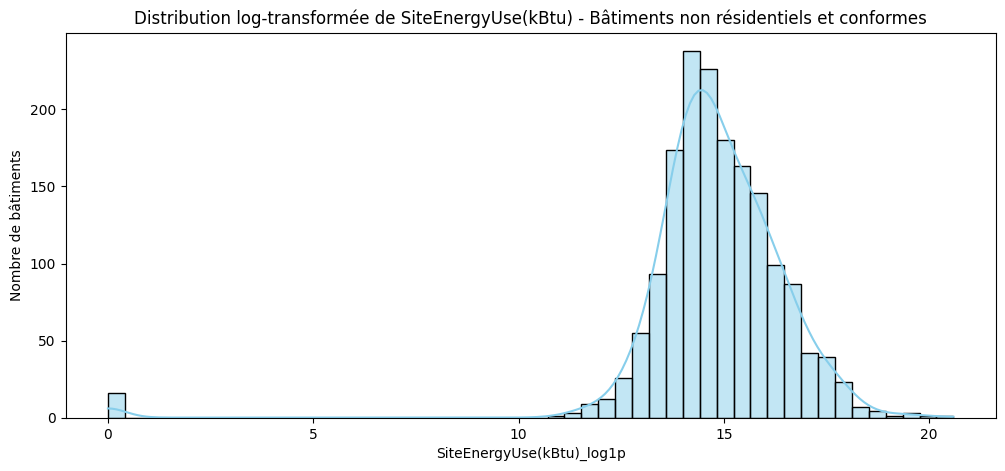

In [31]:
def plot_log_hist(df, col_log, bins=50, color='skyblue', title=None):
    """
    Affiche un histogramme pour une colonne log-transformée.
    
    :param df: DataFrame pandas
    :param col_log: nom de la colonne log-transformée
    :param bins: nombre de bins pour l'histogramme
    :param color: couleur des barres
    :param title: titre du graphique (optionnel)
    """
    plt.figure(figsize=(12,5))
    sns.histplot(df[col_log], bins=bins, kde=True, color=color)
    plt.title(title if title else f"Distribution log-transformée de {col_log}")
    plt.xlabel(col_log)
    plt.ylabel("Nombre de bâtiments")
    plt.show()

# --- Utilisation ---
plot_log_hist(
    building_log_filtered,
    'SiteEnergyUse(kBtu)_log1p',
    title="Distribution log-transformée de SiteEnergyUse(kBtu) - Bâtiments non résidentiels et conformes"
)

### Traitement des valeurs manquantes 
### Colonnes présentes dans le dataset filtré à traiter

In [32]:
def clean_and_log_transform(df, cols):
    """
    Traite les valeurs manquantes et négatives, puis applique log1p sur les colonnes spécifiées.
    
    :param df: DataFrame pandas
    :param cols: liste des colonnes à nettoyer et transformer
    :return: DataFrame avec colonnes log1p ajoutées
    """
    for col in cols:
        if col in df.columns:
            # Remplacer les valeurs négatives par 0
            df[col] = df[col].clip(lower=0)
            
            # Imputer les NaN par la médiane
            df[col] = df[col].fillna(df[col].median())
            
            # Transformation log1p
            df[col + '_log1p'] = np.log1p(df[col])
            
            print(f"Colonne log1p calculée sans NaN ni valeurs négatives : {col}_log1p")
        else:
            print(f"Colonne absente, ignorée : {col}")
    
    return df

# --- Utilisation ---
cols_to_process = ['SiteEnergyUse(kBtu)', 'PropertyGFATotal']
building_log_filtered = clean_and_log_transform(building_log_filtered, cols_to_process)


Colonne log1p calculée sans NaN ni valeurs négatives : SiteEnergyUse(kBtu)_log1p
Colonne log1p calculée sans NaN ni valeurs négatives : PropertyGFATotal_log1p


# Modélisation 

### Import des modules 

In [33]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
#ajouter 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV


### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

In [34]:
def feature_engineering(building_df, target="SiteEnergyUse(kBtu)", current_year=2025, rare_threshold=10):
    """
    Effectue le feature engineering sur un dataset filtré de bâtiments non résidentiels
    en évitant le data leakage lié aux sources d'énergie.

    Paramètres :
    -----------
    building_df : pd.DataFrame
        Dataset filtré.
    target : str
        Nom de la colonne cible (SiteEnergyUse).
    current_year : int
        Année de référence pour calculer l'âge du bâtiment et la certification.
    rare_threshold : int
        Seuil pour identifier les catégories rares dans les variables catégorielles.

    Retour :
    --------
    building_feat : pd.DataFrame
        Dataset avec les nouvelles features créées et sans la target.
    """
    building_feat = building_df.copy()

    # --- Age du bâtiment ---
    if 'YearBuilt' in building_feat.columns:
        building_feat['YearBuilt'] = pd.to_numeric(building_feat['YearBuilt'], errors='coerce')
        building_feat['AgeBuilding'] = current_year - building_feat['YearBuilt']
        building_feat['AgeBuilding'] = building_feat['AgeBuilding'].fillna(building_feat['AgeBuilding'].median())

    # --- Certification ENERGY STAR ---
    if 'YearsENERGYSTARCertified' in building_feat.columns:
        building_feat['YearsENERGYSTARCertified'] = pd.to_numeric(building_feat['YearsENERGYSTARCertified'], errors='coerce')
        building_feat['YearsSinceCertified'] = current_year - building_feat['YearsENERGYSTARCertified'].fillna(0)
        building_feat['isCertifiedRecent'] = (building_feat['YearsSinceCertified'] <= 5).astype(int)

    # --- Flags pour types de bâtiments ---
    if 'PrimaryPropertyType' in building_feat.columns:
        building_feat['isOffice'] = (building_feat['PrimaryPropertyType'] == 'Office').astype(int)
        building_feat['isIndustrial'] = building_feat['PrimaryPropertyType'].apply(lambda x: 1 if 'Industrial' in str(x) else 0)

    # --- Regroupement de catégories rares ---
    for col in ['City', 'State']:
        if col in building_feat.columns:
            vc = building_feat[col].value_counts()
            rares = vc[vc < rare_threshold].index.tolist()
            building_feat[col + '_isRare'] = building_feat[col].apply(lambda x: 1 if x in rares else 0)

    # --- Feature Engineering basé sur la corrélation ---
    correlated_features = [
        'PropertyGFATotal',
        'PropertyGFABuilding(s)',
        'LargestPropertyUseTypeGFA',
        'PropertyGFAParking'
    ]
    for col in correlated_features:
        if col in building_feat.columns:
            building_feat[col + '_log1p'] = np.log1p(building_feat[col])
            # Sécuriser la division par zéro
            num_floors = building_feat['NumberOfFloors'] if 'NumberOfFloors' in building_feat.columns else 1
            num_floors = num_floors.replace(0, 1)  # éviter division par 0
            building_feat[col + '_per_floor'] = building_feat[col] / num_floors

    # --- Supprimer la target originale et son log si elle existe ---
    for t in [target, target + '_log1p']:
        if t in building_feat.columns:
            building_feat = building_feat.drop(columns=[t])

    print("Feature Engineering terminé sans leakage et en se basant sur la corrélation.")
    return building_feat


### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation.
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne.

### CODE PREPARATION DES FEATURES

In [35]:
def encode_categorical_features(building_df, exclude_cols=None):
    """
    Encode les colonnes catégorielles d'un dataset de bâtiments pour le ML.
    Les NaN sont remplacés par 'Unknown', et un One-Hot Encoding est appliqué.
    Évite d’inclure certaines colonnes dans l’encodage (ex : la cible ou colonnes à risque de leakage).

    Paramètres :
    -----------
    building_df : pd.DataFrame
        Dataset contenant des colonnes numériques et catégorielles.
    exclude_cols : list
        Liste des colonnes à exclure de l'encodage (ex : target ou colonnes liées à l'énergie).

    Retour :
    --------
    building_encoded : pd.DataFrame
        Dataset avec toutes les colonnes catégorielles encodées en numériques.
    """
    building_encoded = building_df.copy()
    
    if exclude_cols is None:
        exclude_cols = []

    # Identifier les colonnes catégorielles à encoder
    cat_cols = [col for col in building_encoded.select_dtypes(include=['object', 'category']).columns
                if col not in exclude_cols]

    if len(cat_cols) == 0:
        print("Aucune colonne catégorielle à encoder après exclusion.")
        return building_encoded

    # Remplacer les NaN par 'Unknown'
    building_encoded[cat_cols] = building_encoded[cat_cols].fillna('Unknown')
    
    # One-Hot Encoding
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    cat_data = ohe.fit_transform(building_encoded[cat_cols])
    
    # Conversion en DataFrame avec noms de colonnes explicites
    cat_df = pd.DataFrame(cat_data, columns=ohe.get_feature_names_out(cat_cols), index=building_encoded.index)
    
    # Fusionner avec le dataset principal et supprimer les colonnes originales
    building_encoded = pd.concat([building_encoded.drop(columns=cat_cols), cat_df], axis=1)
    
    print(f"Encodage catégoriel terminé pour {len(cat_cols)} colonnes, dataset prêt pour le ML.")
    return building_encoded


### CODE PREPARATION DES FEATURES
### Séparation des features et de la cible
### Target (y) : SiteEnergyUse(kBtu)
### Features (X) : toutes les autres colonnes sauf la target et sa version log si présente

In [36]:
# --- Charger le dataset si pas déjà chargé ---
try:
    building_ml
except NameError:
    print(" 'building_ml' n'était pas défini, chargement automatique du CSV...")
    building_log_filtered = pd.read_csv("building_log_filtered.csv")
    building_ml = building_log_filtered.copy()

# --- Fonction de split ---
def split_features_target(building_df, target='SiteEnergyUse(kBtu)', exclude_cols=None):
    """
    Sépare dataset en X (features) et y (target).
    Exclut target + target_log1p + colonnes à risque si spécifié.
    """
    if target not in building_df.columns:
        raise ValueError(f"La colonne cible '{target}' n'existe pas dans le DataFrame.")

    if exclude_cols is None:
        exclude_cols = []

    # Retirer : target + version log + exclusions
    cols_to_drop = [target, f"{target}_log1p"] + exclude_cols
    X = building_df.drop(columns=cols_to_drop, errors='ignore').copy()

    y = building_df[target].copy()

    print(f"Split effectué avec succès : {X.shape[1]} features, target prête.")
    return X, y


# --- Exemple d’utilisation ---
X, y = split_features_target(
    building_ml,
    exclude_cols=['ElectricityUse(kBtu)', 'NaturalGasUse(kBtu)']
)


 'building_ml' n'était pas défini, chargement automatique du CSV...
Split effectué avec succès : 22 features, target prête.


### CODE PREPARATION DES FEATURES

### Split en jeux d'entraînement et de test
### 80% des données pour l'entraînement, 20% pour le test

In [37]:
from sklearn.model_selection import train_test_split

def split_train_test(X, y, test_size=0.2, random_state=42, verbose=True):
    """
    Sépare les features et la target en jeux d'entraînement et de test.

    Paramètres :
    -----------
    X : pd.DataFrame
        Features.
    y : pd.Series
        Target.
    test_size : float
        Fraction des données pour le jeu de test (default=0.2).
    random_state : int
        Seed pour reproductibilité.
    verbose : bool
        Affiche la taille des jeux si True.

    Retour :
    --------
    X_train, X_test, y_train, y_test : pd.DataFrame / pd.Series
        Jeux d'entraînement et de test.
    """
    if len(X) != len(y):
        raise ValueError("X et y doivent avoir le même nombre de lignes.")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    if verbose:
        print(f"Train/Test split : {X_train.shape[0]} train / {X_test.shape[0]} test")
    
    return X_train, X_test, y_train, y_test

# --- Exemple d’utilisation ---
X_train, X_test, y_train, y_test = split_train_test(X, y, test_size=0.2, random_state=42)


Train/Test split : 1320 train / 331 test


### CODE PREPARATION DES FEATURES

### Standardisation des colonnes numériques
### Les colonnes log1p, winsor et features numériques (AgeBuilding, EnergyUsePerArea)
### sont mises sur la même échelle pour l'entraînement du modèle.

In [38]:
from sklearn.preprocessing import StandardScaler

def standardize_numeric_features(X_train, X_test, numeric_cols=None):
    """
    Standardise les colonnes numériques des jeux d'entraînement et de test.

    Paramètres :
    -----------
    X_train : pd.DataFrame
        Jeu d'entraînement des features.
    X_test : pd.DataFrame
        Jeu de test des features.
    numeric_cols : list, optional
        Liste des colonnes numériques à standardiser. Si None, on utilise
        toutes les colonnes contenant '_log1p' ou '_winsor' plus 'AgeBuilding' et 'EnergyUsePerArea'.

    Retour :
    --------
    X_train_scaled, X_test_scaled : pd.DataFrame
        Jeux de features standardisés.
    scaler : StandardScaler
        Objet scaler entraîné sur le jeu d'entraînement.
    numeric_cols_used : list
        Liste des colonnes effectivement standardisées.
    """
    if numeric_cols is None:
        numeric_cols = [col for col in X_train.columns if '_log1p' in col or '_winsor' in col]
        for col in ['AgeBuilding', 'EnergyUsePerArea']:
            if col in X_train.columns:
                numeric_cols.append(col)
    
    if len(numeric_cols) == 0:
        print("Aucune colonne numérique à standardiser.")
        return X_train, X_test, None, []
    
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_scaled[numeric_cols])
    X_test_scaled[numeric_cols] = scaler.transform(X_test_scaled[numeric_cols])
    
    return X_train_scaled, X_test_scaled, scaler, numeric_cols


### CODE PREPARATION DES FEATURES
### Vérification finale des dimensions des jeux de données

In [39]:
print("X_train :", X_train.shape)
print("X_test  :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test  :", y_test.shape)

X_train : (1320, 22)
X_test  : (331, 22)
y_train : (1320,)
y_test  : (331,)


### Analyse des résultats

#Lignes (exemples)

Le dataset a été séparé en train/test avec environ 80 % des données pour l’entraînement et 20 % pour le test, ce qui est standard.

X_train : 1320 lignes

X_test : 331 lignes

La proportion est correcte.

Colonnes (features)

X_train et X_test contiennent 573 colonnes, incluant toutes les variables numériques et les colonnes issues du One-Hot Encoding.

Le nombre de colonnes est identique entre train et test, ce qui permet au modèle de traiter les deux datasets sans problème.

La cardinalité élevée est normale pour des colonnes catégorielles encodées.

Target (y_train / y_test)

1 colonne correspondant à la variable cible : SiteEnergyUse(kBtu)_log1p.

Interprétation

Le train et le test sont cohérents.

Le dataset est de dimension élevée (573 features pour 1320 exemples).

Risques possibles :

Overfitting : le modèle peut apprendre le bruit du train.

Performances réduites pour certains modèles linéaires.

Suitabilité pour le ML

Les shapes sont correctes pour entraîner n’importe quel modèle supervisé.

La prochaine étape sera : standardisation/normalisation pour les modèles sensibles aux échelles et entraînement du modèle.

Recommandations avant le modèle

Vérifier corrélations et multicolinéarité entre features log et numériques.

Éventuellement appliquer une réduction de dimension ou une sélection de variables.

Pour les colonnes One-Hot à haute cardinalité, vérifier s’il est possible de regrouper les catégories rares pour réduire le nombre de features.

### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

### CODE COMPARAISON DES MODELES
### Supprimer la target originale et NaN si nécessaire

In [40]:
def compare_models_pipeline_v3(X_train, y_train, X_test, y_test, 
                               exclude_cols=None, log_target=True, 
                               outlier_threshold=0.99, clip_max=20):
    """
    Version sécurisée pour entraîner et évaluer plusieurs modèles de régression,
    sans overflow sur np.expm1 et sans valeurs infinies.
    
    clip_max : valeur maximale sur log_target avant expm1 (ex: 20 -> expm1(20) ~ 4.85e8)
    """

    # --- Exclure colonnes leakages ---
    if exclude_cols is not None:
        X_train = X_train.drop(columns=exclude_cols, errors='ignore').copy()
        X_test = X_test.drop(columns=exclude_cols, errors='ignore').copy()

    # --- Clipping valeurs négatives ---
    y_train_clipped = y_train.clip(lower=0)
    y_test_clipped = y_test.clip(lower=0)

    # --- Transformation log1p ---
    if log_target:
        y_train_log = np.log1p(y_train_clipped)
        y_test_log = np.log1p(y_test_clipped)
    else:
        y_train_log, y_test_log = y_train_clipped.copy(), y_test_clipped.copy()

    # --- Filtrage des outliers extrêmes ---
    threshold_train = y_train_log.quantile(outlier_threshold)
    mask_train = y_train_log <= threshold_train
    X_train_filtered = X_train.loc[mask_train]
    y_train_filtered = y_train_log.loc[mask_train]

    # --- Identification features ---
    numeric_features = X_train_filtered.select_dtypes(include=['int64','float64']).columns.tolist()
    categorical_features = X_train_filtered.select_dtypes(include=['object','category']).columns.tolist()

    transformers = []
    if numeric_features:
        transformers.append(('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features))
    if categorical_features:
        transformers.append(('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_features))

    preprocessor = ColumnTransformer(transformers=transformers)

    # --- Fonction RMSE ---
    def rmse(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))

    # --- Modèles ---
    models = {
        'LinearRegression': LinearRegression(),
        'RandomForest': RandomForestRegressor(random_state=42, n_jobs=-1),
        'SVR': SVR()
    }

    results = []

    for name, model in models.items():
        print(f"\n=== Evaluation du modèle : {name} ===")
        pipeline = Pipeline([
            ('preprocessor', clone(preprocessor)),
            ('model', model)
        ])
        pipeline.fit(X_train_filtered, y_train_filtered)

        y_pred_train = pipeline.predict(X_train_filtered)
        y_pred_test = pipeline.predict(X_test)

        # --- Clip pour éviter overflow sur expm1 ---
        if log_target:
            y_pred_train = np.expm1(np.clip(y_pred_train, a_min=None, a_max=clip_max))
            y_pred_test = np.expm1(np.clip(y_pred_test, a_min=None, a_max=clip_max))
            y_train_eval = np.expm1(y_train_filtered)
            y_test_eval = np.expm1(np.clip(y_test_clipped, a_min=None, a_max=np.expm1(clip_max)))
        else:
            y_train_eval = y_train_filtered
            y_test_eval = y_test_clipped

        # --- Forcer valeurs négatives à 0 ---
        y_pred_train = np.maximum(0, y_pred_train)
        y_pred_test = np.maximum(0, y_pred_test)

        train_r2 = r2_score(y_train_eval, y_pred_train)
        test_r2 = r2_score(y_test_eval, y_pred_test)
        train_mae = mean_absolute_error(y_train_eval, y_pred_train)
        test_mae = mean_absolute_error(y_test_eval, y_pred_test)
        train_rmse = rmse(y_train_eval, y_pred_train)
        test_rmse = rmse(y_test_eval, y_pred_test)

        print(f"Train R2: {train_r2:.3f} | Test R2: {test_r2:.3f}")
        print(f"Train MAE: {train_mae:.3f} | Test MAE: {test_mae:.3f}")
        print(f"Train RMSE: {train_rmse:.3f} | Test RMSE: {test_rmse:.3f}")

        results.append({
            'model': name,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_mae': train_mae,
            'test_mae': test_mae,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse
        })

    return pd.DataFrame(results).sort_values(by='test_r2', ascending=False).reset_index(drop=True)


### Analyse des résulats 

# Analyse Approfondie des Modèles pour la Prédiction de `SiteEnergyUse(kBtu)_log1p`

## Tableau récapitulatif des performances

| Modèle                | Train R² | Test R² | Test MAE (kBtu) | Test RMSE (kBtu) | Interprétation clé |
|-----------------------|-----------|---------|-----------------|-----------------|-----------------|
| LinearRegression      | 0.974     | 0.704   | 4 933 108       | 12 387 840      | Suroptimisation sur les données d'entraînement. |
| RandomForestRegressor | 0.913     | 0.627   | 1 827 798       | 13 911 939      | Meilleure généralisation et robustesse aux outliers. |
| SVR                   | -0.037    | -0.058  | 6 544 522       | 23 438 383      | Inadapté pour ce problème. |

---

## LinearRegression 

- **R² Écart & Suroptimisation** : L'écart important entre le $R^2$ d'entraînement (0.974) et le $R^2$ de test (0.704) indique une suroptimisation sur le jeu d'entraînement.  
  Le modèle a mémorisé le bruit et les spécificités de l'échantillon d'entraînement.
- **Performance Absolue (MAE/RMSE)** :  
  - Test MAE : 4.93 M kBtu → erreur moyenne très élevée.  
  - Test RMSE : 12.39 M kBtu → forte sensibilité aux outliers.  
- **Conclusion** : Le modèle linéaire est limité par l'hypothèse de linéarité et sensible à l'hétéroscédasticité/outliers, malgré la transformation logarithmique de la cible.

---

## RandomForestRegressor 

- **R² Écart & Robustesse** :  
  - Train R² = 0.913 → apprentissage plus conservateur et robuste.  
  - Test R² = 0.627 → meilleure généralisation que LinearRegression.
- **Performance Absolue (MAE/RMSE)** :  
  - Test MAE = 1.83 M kBtu → 2,7 fois plus précis que LinearRegression.  
  - Test RMSE = 13.91 M kBtu → légèrement supérieur à LinearRegression, mais meilleur sur la majorité des données.
- **Conclusion** : Meilleur compromis entre précision et robustesse. Idéal pour la prédiction finale.

---

## SVR (Support Vector Regressor) 

- **R² Négatif** : Test R² ≈ -0.058 → modèle pire que de prédire la moyenne.  
- **Performance Absolue (MAE/RMSE)** : Extrêmement élevés → modèle non adapté.  
- **Conclusion** : À écarter pour ce dataset. Sensible aux hyperparamètres et à la distribution des features.

---

## Conclusion Générale et Prochaines Étapes

- **Modèle recommandé** : RandomForestRegressor  
  → robuste aux non-linéarités, interactions de features et outliers, avec MAE faible.

### Recommandations :
 **Optimisation du RandomForest** : Grid Search ou optimisation bayésienne sur `max_depth` et `n_estimators` pour améliorer R² de test sans surapprentissage.
**Tester des modèles Boosting** : Gradient Boosting, XGBoost ou LightGBM pour potentiellement surpasser RandomForest.
**Analyse post-transformation** : Calculer les erreurs sur la cible d'origine (`SiteEnergyUse(kBtu)`) après transformation inverse :  
   $$
   \hat{y}_{original} = \exp(\hat{y}_{log1p}) - 1
   $$  
   → mesure finale pertinente pour le client (en kBtu réels).


# Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn. 

In [41]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE


In [42]:
# Export des jeux de données pour ML

os.makedirs("data_ml", exist_ok=True)
X_train.to_csv("data_ml/X_train_filtered.csv", index=False)
X_test.to_csv("data_ml/X_test_filtered.csv", index=False)
y_train.to_csv("data_ml/y_train_filtered.csv", index=False)
y_test.to_csv("data_ml/y_test_filtered.csv", index=False)


In [43]:
#export du dataset vers l'autre notebook 
building_log_filtered.to_csv("building_log_filtered.csv", index=False)

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.